In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

import warnings
warnings.simplefilter(action='ignore')
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

In [9]:
df = pd.read_csv('bmw.csv')
df.head()

model  year  price transmission  mileage fuelType  tax   mpg  \
0   5 Series  2014  11200    Automatic    67068   Diesel  125  57.6   
1   6 Series  2018  27000    Automatic    14827   Petrol  145  42.8   
2   5 Series  2016  16000    Automatic    62794   Diesel  160  51.4   
3   1 Series  2017  12750    Automatic    26676   Diesel  145  72.4   
4   7 Series  2014  14500    Automatic    39554   Diesel  160  50.4   

   engineSize  
0         2.0  
1         2.0  
2         3.0  
3         1.5  
4         3.0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [11]:
df.describe()

year          price        mileage           tax           mpg  \
count  10781.000000   10781.000000   10781.000000  10781.000000  10781.000000   
mean    2017.078935   22733.408867   25496.986550    131.702068     56.399035   
std        2.349038   11415.528189   25143.192559     61.510755     31.336958   
min     1996.000000    1200.000000       1.000000      0.000000      5.500000   
25%     2016.000000   14950.000000    5529.000000    135.000000     45.600000   
50%     2017.000000   20462.000000   18347.000000    145.000000     53.300000   
75%     2019.000000   27940.000000   38206.000000    145.000000     62.800000   
max     2020.000000  123456.000000  214000.000000    580.000000    470.800000   

         engineSize  
count  10781.000000  
mean       2.167767  
std        0.552054  
min        0.000000  
25%        2.000000  
50%        2.000000  
75%        2.000000  
max        6.600000

In [12]:
df.isnull().values.any()

False

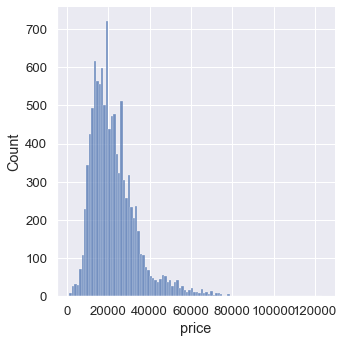

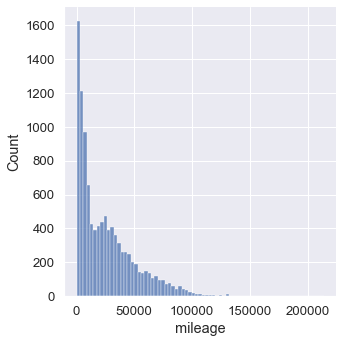

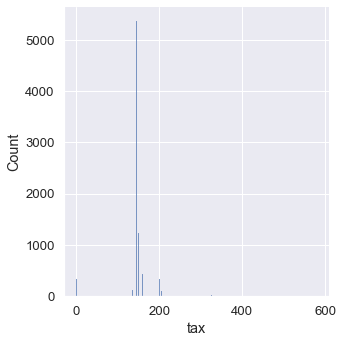

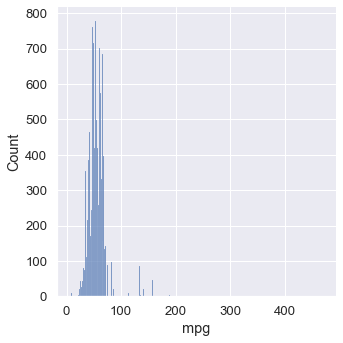

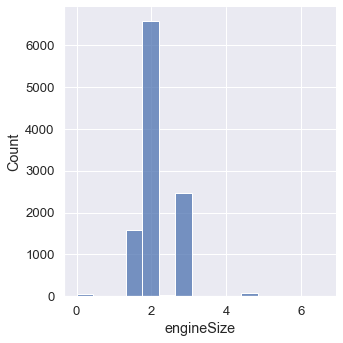

In [13]:
for col in df[['price', 'mileage', 'tax', 'mpg', 'engineSize']]:
    sns.displot(df[col])
    plt.show()

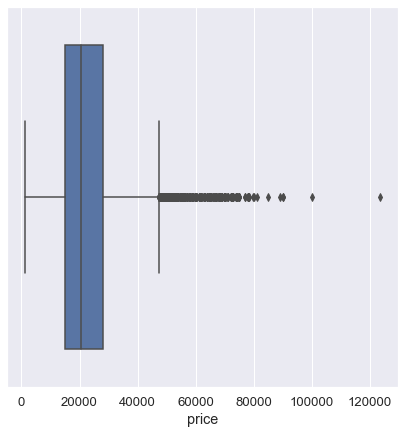

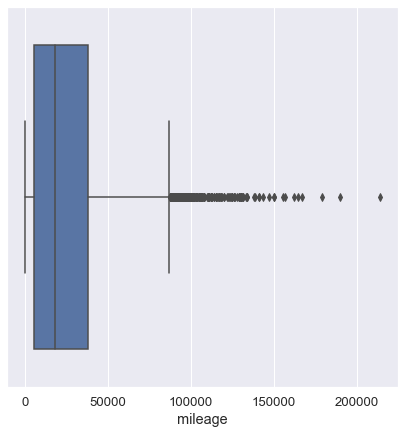

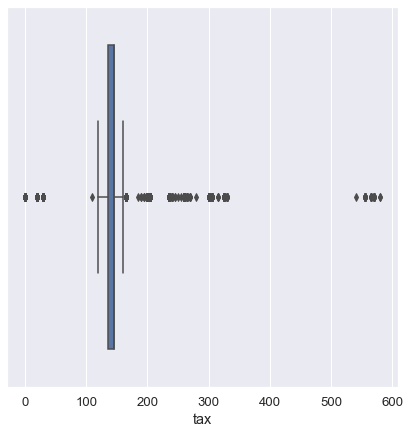

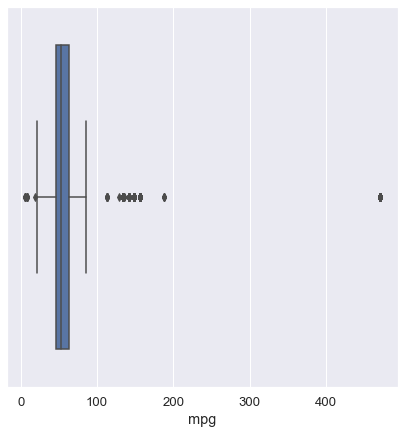

In [14]:
for col in df[['price', 'mileage', 'tax', 'mpg']]:
    sns.boxplot(df[col])
    plt.show()

In [15]:
df['transmission'].unique()

array(['Automatic', 'Manual', 'Semi-Auto'], dtype=object)

In [16]:
df['fuelType'].unique()

array(['Diesel', 'Petrol', 'Other', 'Hybrid', 'Electric'], dtype=object)

In [17]:
df['model'].unique()

array([' 5 Series', ' 6 Series', ' 1 Series', ' 7 Series', ' 2 Series',
       ' 4 Series', ' X3', ' 3 Series', ' X5', ' X4', ' i3', ' X1', ' M4',
       ' X2', ' X6', ' 8 Series', ' Z4', ' X7', ' M5', ' i8', ' M2',
       ' M3', ' M6', ' Z3'], dtype=object)

In [18]:
df['model'].nunique()

24

In [19]:
df['model'] = df['model'].apply(lambda x: x.strip())

In [20]:
df['model'].unique()

array(['5 Series', '6 Series', '1 Series', '7 Series', '2 Series',
       '4 Series', 'X3', '3 Series', 'X5', 'X4', 'i3', 'X1', 'M4', 'X2',
       'X6', '8 Series', 'Z4', 'X7', 'M5', 'i8', 'M2', 'M3', 'M6', 'Z3'],
      dtype=object)

---------------------------------------------------------------------------------------------------- 

3 Series    2443
1 Series    1969
2 Series    1229
5 Series    1056
4 Series     995
X1           804
X3           551
X5           468
X2           288
X4           179
M4           125
Z4           108
6 Series     108
X6           106
7 Series     106
X7            55
i3            43
8 Series      39
M5            29
M3            27
M2            21
i8            17
M6             8
Z3             7
Name: model, dtype: int64


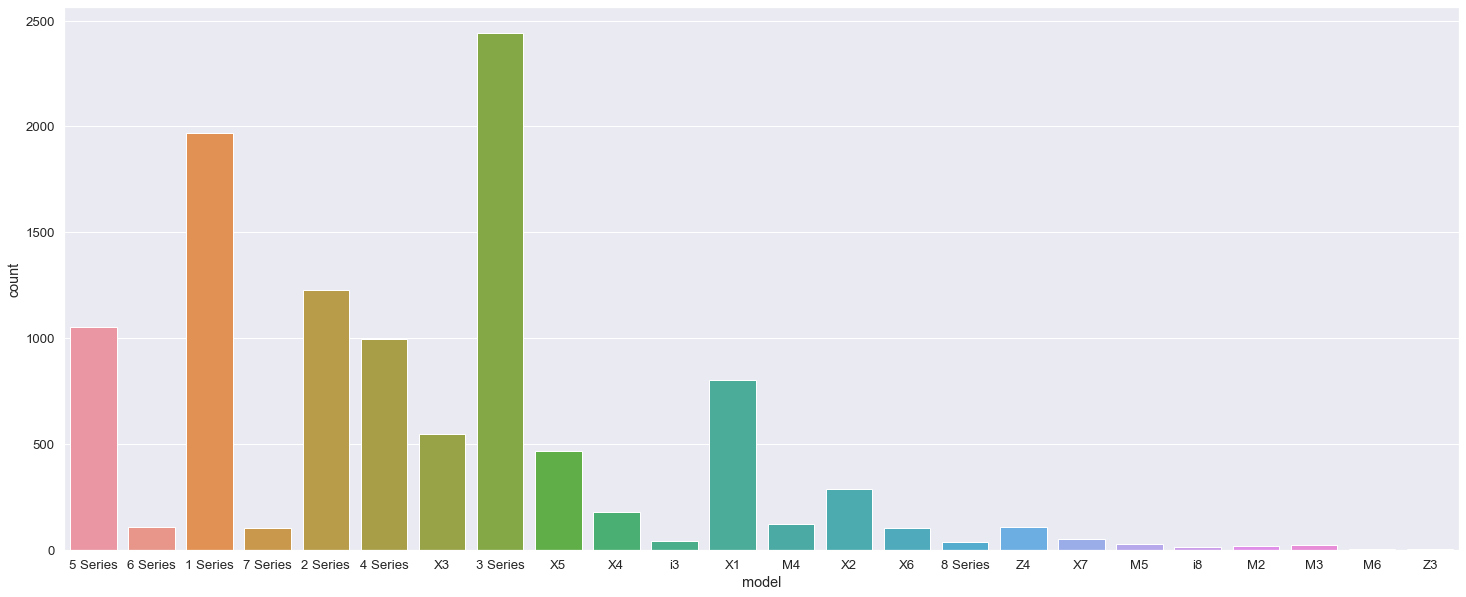

---------------------------------------------------------------------------------------------------- 

Semi-Auto    4666
Automatic    3588
Manual       2527
Name: transmission, dtype: int64


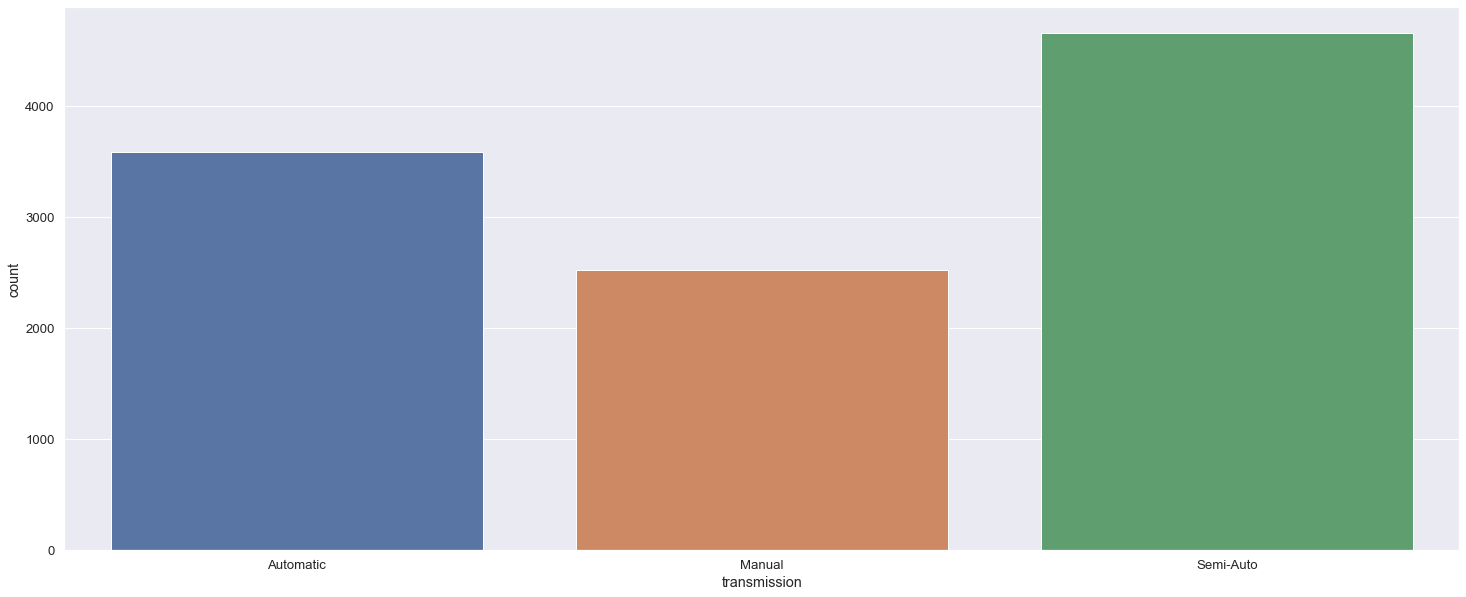

---------------------------------------------------------------------------------------------------- 

Diesel      7027
Petrol      3417
Hybrid       298
Other         36
Electric       3
Name: fuelType, dtype: int64


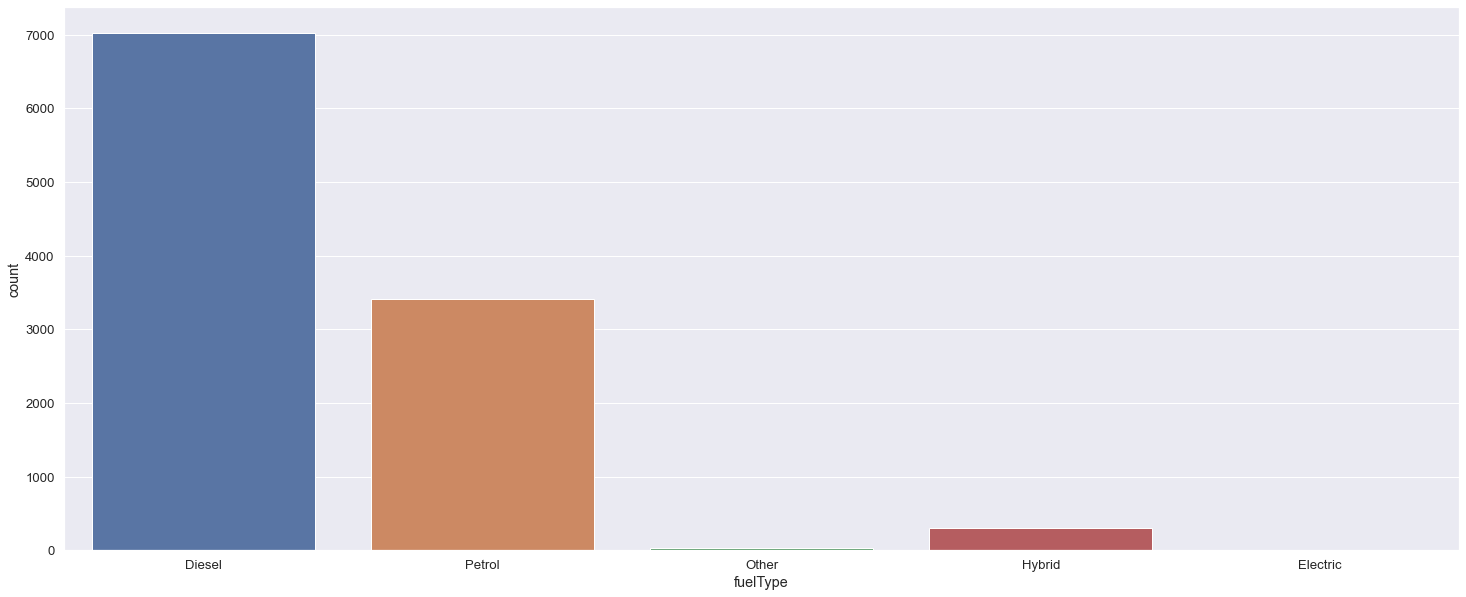

In [21]:
for col in df.select_dtypes('O'):
    print('-'*100, '\n')
    print(df[col].value_counts())
    plt.figure(figsize=(25,10))
    sns.countplot(df[col])
    plt.show()

In [22]:
corr1 = df.groupby('model')['price'].mean().sort_values()
corr1

model
Z3           5826.428571
1 Series    15821.670391
i3          18667.116279
2 Series    19539.371847
X1          19816.564677
3 Series    19880.857962
4 Series    22498.418090
5 Series    22537.428030
6 Series    24354.370370
Z4          27001.935185
X3          27758.310345
X2          28486.663194
M3          30229.777778
M6          32190.000000
X4          32721.335196
7 Series    36934.320755
X5          39651.196581
M2          43140.333333
M4          43274.232000
X6          43838.613208
i8          57012.588235
M5          57760.000000
8 Series    63997.794872
X7          69842.763636
Name: price, dtype: float64

<AxesSubplot:xlabel='model'>

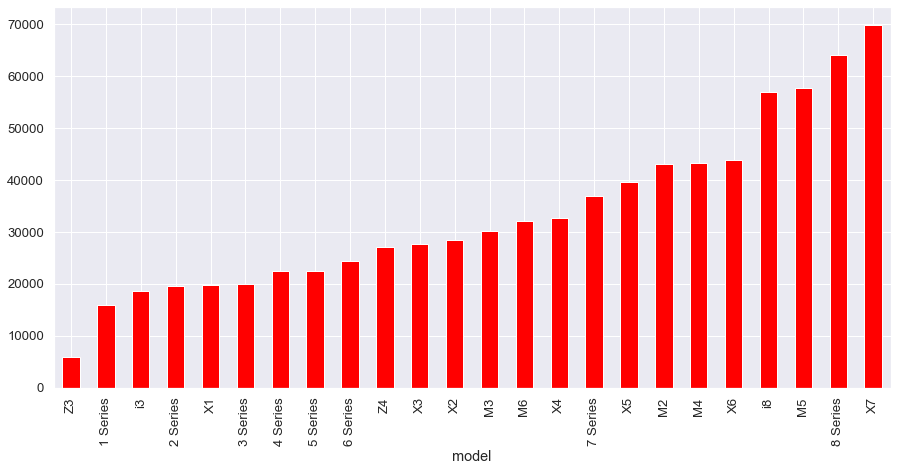

In [23]:
plt.figure(figsize=(15,7))
corr1.plot(kind='bar', color='red')

In [24]:
corr2 = df.groupby('year')['price'].mean().sort_values()
corr2

year
2000     1624.500000
1999     3285.000000
1997     3950.000000
1998     3950.000000
2007     4830.500000
2006     5252.714286
2005     5390.166667
2002     5486.500000
1996     5995.000000
2008     6240.043478
2009     6618.100000
2001     7333.333333
2010     7490.390244
2004     8213.166667
2011     9099.098039
2003     9222.500000
2012     9533.689076
2013    11118.355742
2014    13323.598802
2015    15199.753796
2016    16638.403826
2017    19267.174898
2018    22721.656840
2019    31025.864275
2020    35377.680764
Name: price, dtype: float64

<AxesSubplot:xlabel='year'>

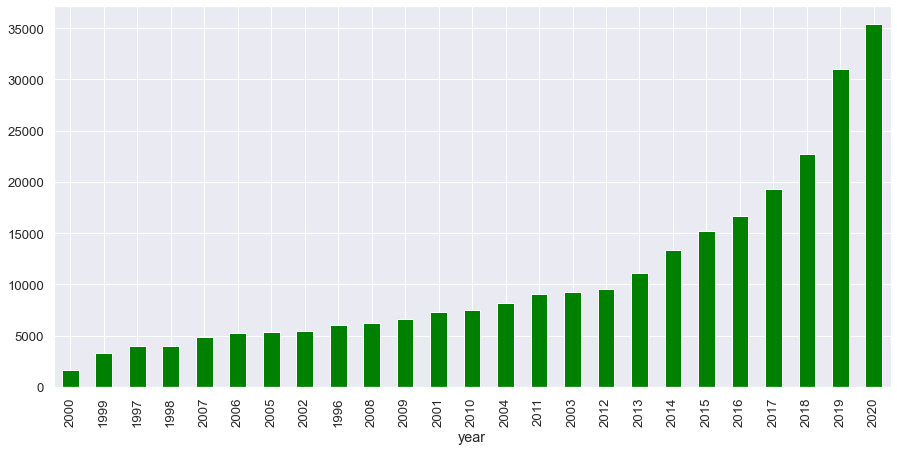

In [25]:
plt.figure(figsize=(15,7))
corr2.plot(kind='bar', color='green')

<AxesSubplot:xlabel='year', ylabel='price'>

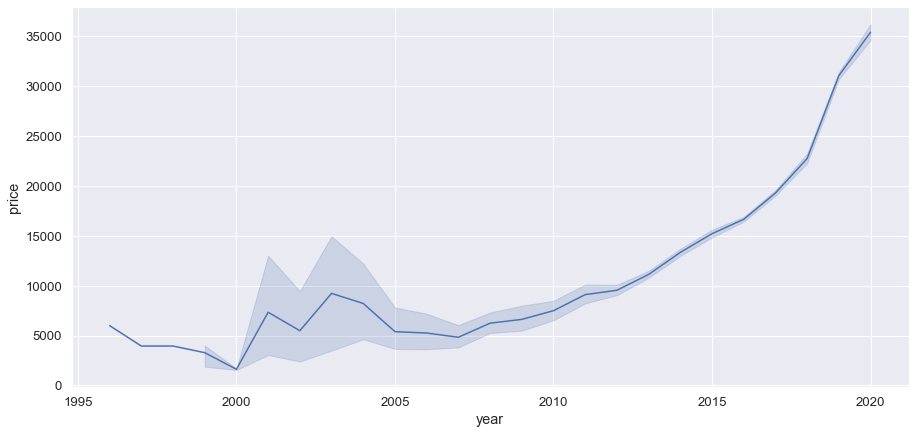

In [26]:
plt.figure(figsize=(15,7))
sns.lineplot(x=df['year'], y=df['price'])

In [27]:
corr3 = df.groupby('transmission')['price'].mean().sort_values()
corr3

transmission
Manual       14637.451128
Automatic    22419.023969
Semi-Auto    27359.747964
Name: price, dtype: float64

<AxesSubplot:xlabel='transmission'>

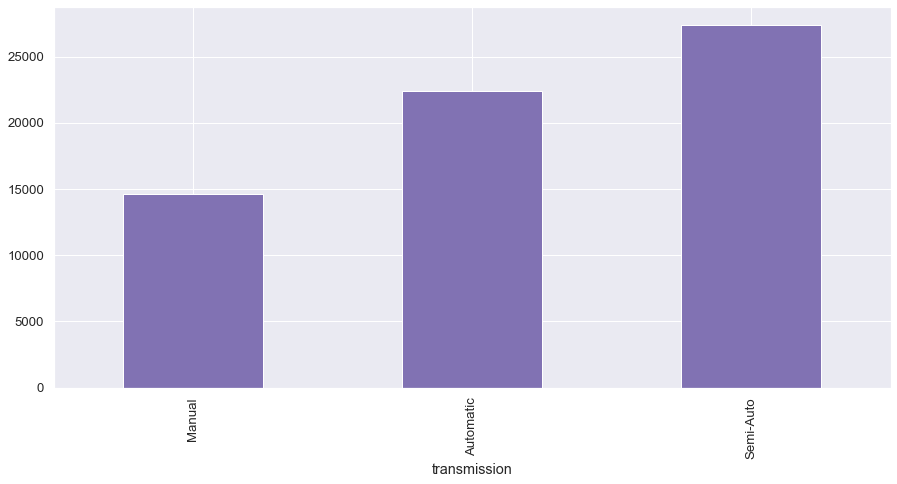

In [28]:
plt.figure(figsize=(15,7))
corr3.plot(kind='bar', color='m')

In [29]:
corr4 = df.groupby('fuelType')['price'].mean().sort_values()
corr4

fuelType
Other       18193.861111
Electric    18466.000000
Diesel      21779.262986
Petrol      24360.271583
Hybrid      27169.714765
Name: price, dtype: float64

<AxesSubplot:xlabel='fuelType'>

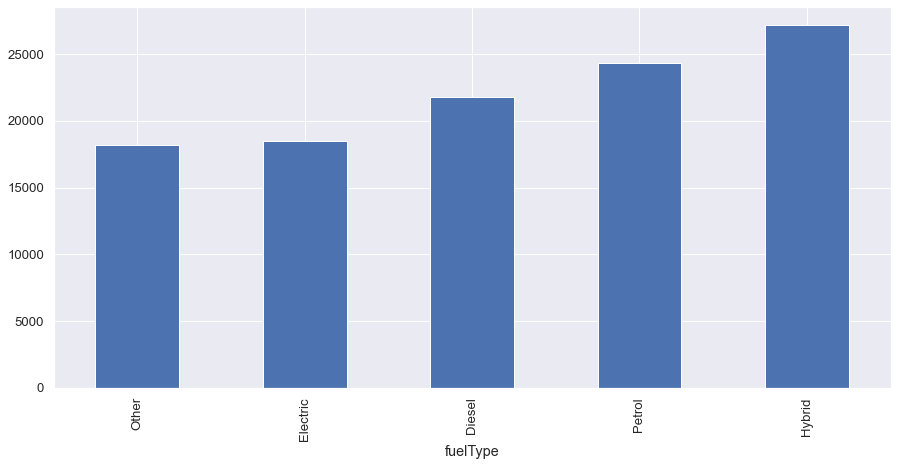

In [30]:
plt.figure(figsize=(15,7))
corr4.plot(kind='bar', color='b')

In [31]:
corr5 = df.groupby('engineSize')['price'].mean().sort_values()
corr5

engineSize
2.8     3597.500000
1.9     3968.000000
2.5     5761.571429
2.2     6897.500000
3.5     6990.000000
1.6     9353.330275
5.0    12495.000000
3.2    16049.800000
1.5    17258.086124
1.0    17400.000000
0.6    17920.000000
0.0    18425.404255
4.0    19157.333333
2.0    20700.057186
3.0    31546.716436
4.4    46753.658228
6.6    54975.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='engineSize'>

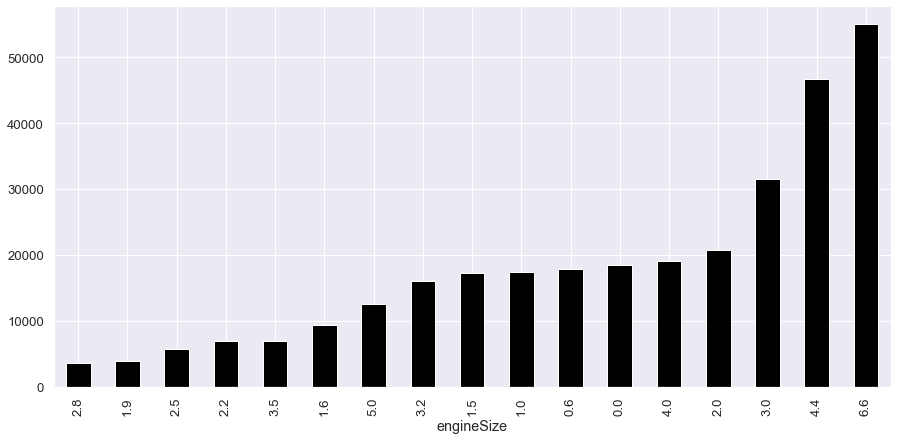

In [32]:
plt.figure(figsize=(15,7))
corr5.plot(kind='bar', color='black')

<AxesSubplot:xlabel='mileage', ylabel='price'>

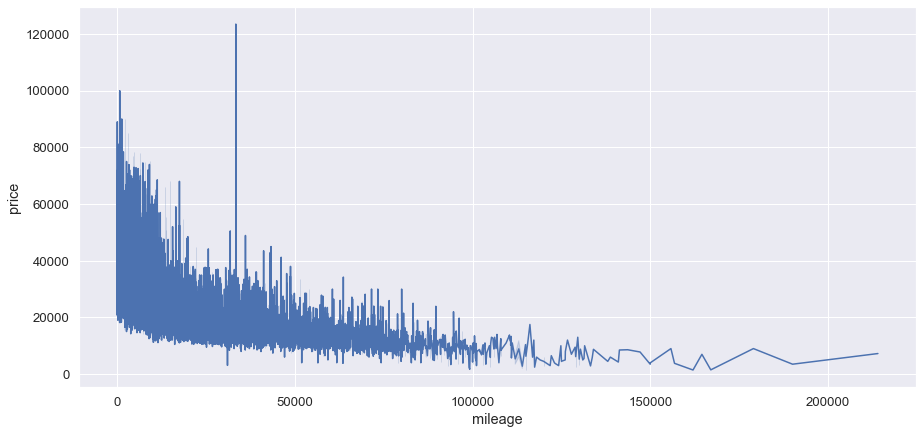

In [33]:
plt.figure(figsize=(15,7))
sns.lineplot(x=df['mileage'], y=df['price'])

<AxesSubplot:xlabel='tax', ylabel='price'>

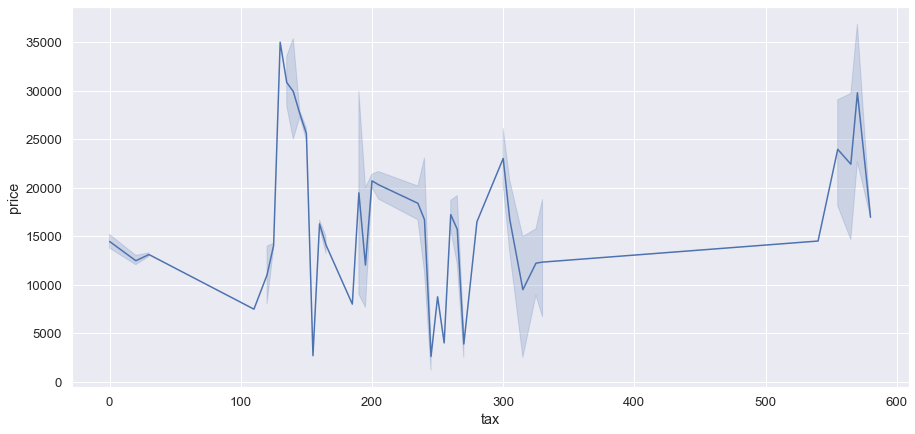

In [34]:
plt.figure(figsize=(15,7))
sns.lineplot(x=df['tax'], y=df['price'])

<AxesSubplot:xlabel='mpg', ylabel='price'>

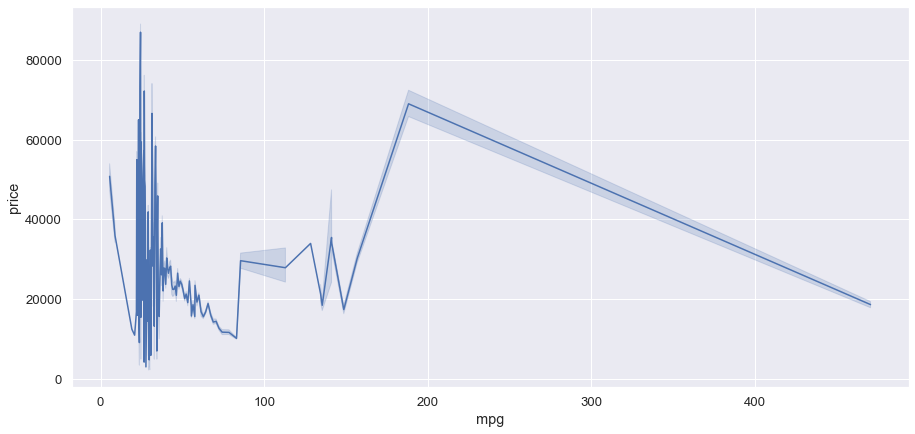

In [35]:
plt.figure(figsize=(15,7))
sns.lineplot(x=df['mpg'], y=df['price'])

<AxesSubplot:>

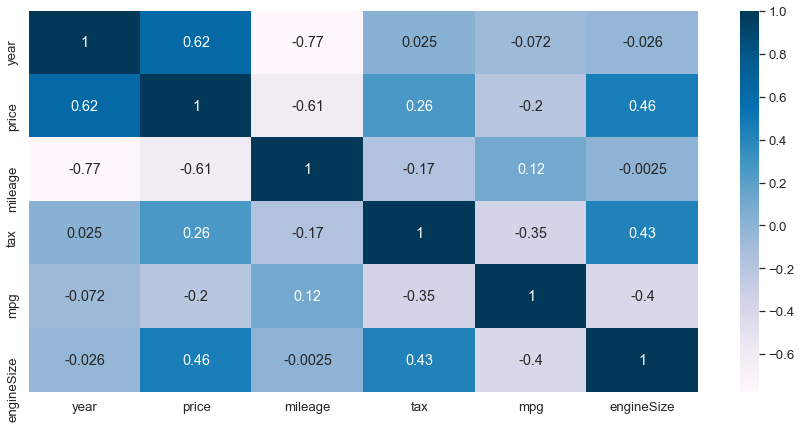

In [36]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, cmap='PuBu')

In [37]:
df.head()

model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0  5 Series  2014  11200    Automatic    67068   Diesel  125  57.6         2.0
1  6 Series  2018  27000    Automatic    14827   Petrol  145  42.8         2.0
2  5 Series  2016  16000    Automatic    62794   Diesel  160  51.4         3.0
3  1 Series  2017  12750    Automatic    26676   Diesel  145  72.4         1.5
4  7 Series  2014  14500    Automatic    39554   Diesel  160  50.4         3.0

In [38]:
df.shape

(10781, 9)

In [39]:
df = pd.get_dummies(df, drop_first=True)

In [40]:
df.head()

year  price  mileage  tax   mpg  engineSize  model_2 Series  \
0  2014  11200    67068  125  57.6         2.0               0   
1  2018  27000    14827  145  42.8         2.0               0   
2  2016  16000    62794  160  51.4         3.0               0   
3  2017  12750    26676  145  72.4         1.5               0   
4  2014  14500    39554  160  50.4         3.0               0   

   model_3 Series  model_4 Series  model_5 Series  ...  model_Z3  model_Z4  \
0               0               0               1  ...         0         0   
1               0               0               0  ...         0         0   
2               0               0               1  ...         0         0   
3               0               0               0  ...         0         0   
4               0               0               0  ...         0         0   

   model_i3  model_i8  transmission_Manual  transmission_Semi-Auto  \
0         0         0                    0                       0   
1         0         0                    0                       0   
2         0         0                    0                       0   
3         0         0                    0                       0   
4         0         0                    0                       0   

   fuelType_Electric  fuelType_Hybrid  fuelType_Other  fuelType_Petrol  
0                  0                0               0                0  
1                  0                0               0                1  
2                  0                0               0                0  
3                  0                0               0                0  
4                  0                0               0                0  

[5 rows x 35 columns]

In [41]:
df.shape

(10781, 35)

In [42]:
x = df.drop('price', axis=1) 
y = df['price']

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [44]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [45]:
models = {
    "LR": LinearRegression(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor(),
    "XGBR": XGBRegressor(),
    "KNNR": KNeighborsRegressor(), 
    "Naive": GaussianNB(),
    "SVM": SVR()
}

In [46]:
for name, model in models.items():
    print('-'*30)
    print(f'Using model: {name}')
    
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    
    y_pred = model.predict(x_test)
    print(f'Test Score: {r2_score(y_test, y_pred)}')  

------------------------------
Using model: LR
Training Score: 0.8703664376282947
Test Score: 0.8556360534779262
------------------------------
Using model: DT
Training Score: 0.999672800861357
Test Score: 0.9290912567575482
------------------------------
Using model: RF
Training Score: 0.991475480434
Test Score: 0.955504543593357
------------------------------
Using model: XGBR
Training Score: 0.9826516567105817
Test Score: 0.9578739029707561
------------------------------
Using model: KNNR
Training Score: 0.9530052146172473
Test Score: 0.9274715713150459
------------------------------
Using model: Naive
Training Score: 0.312152133580705
Test Score: 0.806409527082012
------------------------------
Using model: SVM
Training Score: -0.003004948491137638
Test Score: -0.008237758719658927


In [47]:
model = XGBRegressor()
model.fit(x_train, y_train)
print(f'Training Score: {model.score(x_train, y_train)}')
y_pred = model.predict(x_test)
print(f'Test Score: {r2_score(y_test, y_pred)}') 

Training Score: 0.9826516567105817
Test Score: 0.9578739029707561


In [50]:
import joblib

In [51]:
joblib.dump(model, 'model.h5')

['model.h5']

In [52]:
joblib.dump(scaler, 'scaler.h5')

['scaler.h5']

In [53]:
x.columns

Index(['year', 'mileage', 'tax', 'mpg', 'engineSize', 'model_2 Series',
       'model_3 Series', 'model_4 Series', 'model_5 Series', 'model_6 Series',
       'model_7 Series', 'model_8 Series', 'model_M2', 'model_M3', 'model_M4',
       'model_M5', 'model_M6', 'model_X1', 'model_X2', 'model_X3', 'model_X4',
       'model_X5', 'model_X6', 'model_X7', 'model_Z3', 'model_Z4', 'model_i3',
       'model_i8', 'transmission_Manual', 'transmission_Semi-Auto',
       'fuelType_Electric', 'fuelType_Hybrid', 'fuelType_Other',
       'fuelType_Petrol'],
      dtype='object')

In [54]:
len(x.columns)

34